In [1]:
%matplotlib inline

import os
import utils
import re
import nltk
import json
import gensim
import utils
import dateutil
import scipy as sp
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
from utils import metrics
# import advertools as adv
from scipy import sparse
from functools import reduce
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn import preprocessing
from IPython.display import Image
import matplotlib.pyplot as plt 
from wordcloud import WordCloud
from textblob import TextBlob
from functools import reduce
from nltk.corpus import stopwords
from typing import List, Callable, Dict
from nltk.corpus import stopwords
from nltk.corpus import stopwords
from sklearn.svm import LinearSVR
from sklearn.metrics import r2_score
sns.set(style="ticks", color_codes=True)
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from utils import Feature_Extraction
from utils import hyperparameterTuning_MLP
from utils import hyperparameterTuning_XGBoost
from utils import hyperparameterTuning_RandomForest
from utils import removeColumnContainString
import sys

random_state=2022

c:\Users\jyoti\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\jyoti\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\jyoti\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
c:\Users\jyoti\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [2]:
figurePath=utils.folderPath('SavedFigures')
datasetePath=utils.folderPath('Dataset')  

1
1


In [3]:
dataset1='C:\\Users\\jyoti\\Desktop\\NLP\\NLP_project\\NLP-project-\\Models\\Dataset\\'

In [4]:
extracted=pd.read_csv(dataset1 + '3.csv')

In [5]:
extracted

,Unnamed: 0,caption,following,likes,posts_count,followers,INDUSTRY_childcare,INDUSTRY_cosmetics,INDUSTRY_fashion,INDUSTRY_fitness,...,TextBlob_Polarity,hashtags,hashcounts,mentions,mention_count,emoji,emoji_text,emoji_count,caption_length,hashtag_popularity
0,0,possible thanks lateral flow testing fast simp...,964.0,14.0,47.0,1093.0,0,1,0,0,...,0.282576,"'#londontesting', '#chelseabridgeclinic', '#lo...",8,NaN,0,"['⏱', '📄', '🧑🏻\u200d⚕️', '👨\u200d👩\u200d👧\u200...","['stopwatch', 'page facing up', 'health worker...",10,860,3219.750000
1,1,grateful kind words feedback receiving since s...,964.0,12.0,47.0,1093.0,0,1,0,0,...,0.168056,"'#thankyou', '#thankful', '#feedback', '#chlse...",9,NaN,0,"['👏', '🧡']","['clapping hands', 'orange heart']",2,716,5178.333333
2,2,hand dived isle jura scallop smoked roe leek c...,308.0,100.0,343.0,4202.0,0,0,0,0,...,0.000000,"'#edinburghfoodies', '#edinburghrestaurants', ...",25,NaN,0,[],[],0,425,17663.680000
3,3,jerusalem artichoke prepared first dessert mal...,308.0,81.0,343.0,4202.0,0,0,0,0,...,0.250000,"'#michelin', '#michelinstar', '#michelinuk', '...",28,NaN,0,[],[],0,490,16841.857143
4,4,main course seasonal 7 course menu borders roe...,308.0,146.0,343.0,4202.0,0,0,0,0,...,0.166667,"'#michelin', '#michelinstar', '#michelinuk', '...",28,"'@castlegamescotland', '@wellocksfood'",2,[],[],0,530,16841.857143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41736,41736,alongside hospitality performing arts also mas...,599.0,4079.0,1933.0,167394.0,0,0,0,0,...,0.428030,"'#lookingforward', '#theatreland', '#performin...",6,"'@evening', '@tiktok', '@nationalyouththeatre'...",4,[],[],0,878,153640.333333
41737,41737,isnt looking forward waking beautiful nights s...,599.0,1621.0,1933.0,167394.0,0,0,0,0,...,0.491667,"'#lookingforward', '#travelinspiration', '#lov...",7,'@youmustgoblog',1,['🍾'],['bottle with popping cork'],1,532,81714.428571
41738,41738,missing london town heres shot really showcase...,599.0,1548.0,1933.0,167394.0,0,0,0,0,...,0.260417,"'#lookingforward', '#londonviews', '#prettycit...",8,'@damienhewetson',1,[],[],0,479,102699.125000
41739,41739,closed going try keep happy inspired mix beaut...,599.0,2637.0,1933.0,167394.0,0,0,0,0,...,0.445833,"'#lookingforward', '#travelinspo', '#datenight...",7,NaN,0,[],[],0,643,70165.571429


In [6]:
extracted.drop(['Unnamed: 0'], axis = 1,inplace=True)

In [7]:
extracted=extracted.astype(str)

In [8]:
tfidf_caption=Feature_Extraction(extracted['caption'],4,TfidfVectorizer)
tfidf_caption
# print("\n\n\n")
# tfidf_hashtags=Feature_Extraction(extracted['hashtags'],3,TfidfVectorizer)
# tfidf_hashtags
# print("\n\n\n")
# tfidf_emoji_text=Feature_Extraction(extracted['emoji_text'],3,TfidfVectorizer)
# tfidf_emoji_text
# print("\n\n\n")
# tfidf_mentions=Feature_Extraction(extracted['mentions'],3,TfidfVectorizer)
# tfidf_mentions
print("\n\n\n")
tfidf_dataset = pd.DataFrame(np.hstack((tfidf_caption,extracted)))
tfidf_dataset

always amazing available beautiful chocolate christmas coffee consultation delicious enjoy every experience favourite first friday great happy little london looking lovely online order patient patients people perfect please procedure results share special start sunday surgery thank today treatment visit website weekend would years youre






,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.2825757575757575,"'#londontesting', '#chelseabridgeclinic', '#lo...",8,nan,0,"['⏱', '📄', '🧑🏻\u200d⚕️', '👨\u200d👩\u200d👧\u200...","['stopwatch', 'page facing up', 'health worker...",10,860,3219.75
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.1680555555555555,"'#thankyou', '#thankful', '#feedback', '#chlse...",9,nan,0,"['👏', '🧡']","['clapping hands', 'orange heart']",2,716,5178.333333333333
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,"'#edinburghfoodies', '#edinburghrestaurants', ...",25,nan,0,[],[],0,425,17663.68
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.25,"'#michelin', '#michelinstar', '#michelinuk', '...",28,nan,0,[],[],0,490,16841.85714285714
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.1666666666666666,"'#michelin', '#michelinstar', '#michelinuk', '...",28,"'@castlegamescotland', '@wellocksfood'",2,[],[],0,530,16841.85714285714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.428030303030303,"'#lookingforward', '#theatreland', '#performin...",6,"'@evening', '@tiktok', '@nationalyouththeatre'...",4,[],[],0,878,153640.33333333334
41737,0.0,0.0,0.0,0.335284,0.0,0.0,0.0,0.0,0.0,0.0,...,0.4916666666666667,"'#lookingforward', '#travelinspiration', '#lov...",7,'@youmustgoblog',1,['🍾'],['bottle with popping cork'],1,532,81714.42857142857
41738,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.511659,...,0.2604166666666666,"'#lookingforward', '#londonviews', '#prettycit...",8,'@damienhewetson',1,[],[],0,479,102699.125
41739,0.0,0.0,0.0,0.444714,0.0,0.0,0.0,0.0,0.0,0.0,...,0.4458333333333333,"'#lookingforward', '#travelinspo', '#datenight...",7,nan,0,[],[],0,643,70165.57142857143


In [9]:
print(len(tfidf_dataset.columns))
a=len(tfidf_dataset.columns)-31+1
print(a)

76
46


In [10]:
tfidf_dataset[a]

0          14.0
1          12.0
2         100.0
3          81.0
4         146.0
          ...  
41736    4079.0
41737    1621.0
41738    1548.0
41739    2637.0
41740    5551.0
Name: 46, Length: 41741, dtype: object

In [11]:
tfidf_dataset.rename(columns = {a:'likes'}, inplace = True)

In [12]:
# c=len(tfidf_dataset.columns)-29+1
# print(c)

In [13]:
tfidf_dataset

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.2825757575757575,"'#londontesting', '#chelseabridgeclinic', '#lo...",8,nan,0,"['⏱', '📄', '🧑🏻\u200d⚕️', '👨\u200d👩\u200d👧\u200...","['stopwatch', 'page facing up', 'health worker...",10,860,3219.75
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.1680555555555555,"'#thankyou', '#thankful', '#feedback', '#chlse...",9,nan,0,"['👏', '🧡']","['clapping hands', 'orange heart']",2,716,5178.333333333333
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,"'#edinburghfoodies', '#edinburghrestaurants', ...",25,nan,0,[],[],0,425,17663.68
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.25,"'#michelin', '#michelinstar', '#michelinuk', '...",28,nan,0,[],[],0,490,16841.85714285714
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.1666666666666666,"'#michelin', '#michelinstar', '#michelinuk', '...",28,"'@castlegamescotland', '@wellocksfood'",2,[],[],0,530,16841.85714285714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.428030303030303,"'#lookingforward', '#theatreland', '#performin...",6,"'@evening', '@tiktok', '@nationalyouththeatre'...",4,[],[],0,878,153640.33333333334
41737,0.0,0.0,0.0,0.335284,0.0,0.0,0.0,0.0,0.0,0.0,...,0.4916666666666667,"'#lookingforward', '#travelinspiration', '#lov...",7,'@youmustgoblog',1,['🍾'],['bottle with popping cork'],1,532,81714.42857142857
41738,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.511659,...,0.2604166666666666,"'#lookingforward', '#londonviews', '#prettycit...",8,'@damienhewetson',1,[],[],0,479,102699.125
41739,0.0,0.0,0.0,0.444714,0.0,0.0,0.0,0.0,0.0,0.0,...,0.4458333333333333,"'#lookingforward', '#travelinspo', '#datenight...",7,nan,0,[],[],0,643,70165.57142857143


In [14]:
df=removeColumnContainString(tfidf_dataset)

Couldn't covert 44 to float
Couldn't covert 67 to float
Couldn't covert 69 to float
Couldn't covert 71 to float
Couldn't covert 72 to float


In [15]:
df = pd.DataFrame(df)
data=df.astype(str)

normalizer = preprocessing.MinMaxScaler(feature_range=(0, 1))
tfidf_normalized_df = pd.DataFrame(normalizer.fit_transform(data),  columns = data.columns)

In [16]:
dropped = [14,20,26,28,31,32,33,34,49,51,52,54,55,56]
tfidf_normalized_df = tfidf_normalized_df.drop(dropped,axis=1)
tfidf_normalized_df

,0,1,2,3,4,5,6,7,8,9,...,62,63,64,65,66,68,70,73,74,75
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.632390,0.641288,0.166667,0.000000,0.192308,0.390632,0.005571
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.405556,0.584028,0.187500,0.000000,0.038462,0.325148,0.008959
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,1.0,0.0,0.000000,0.500000,0.520833,0.000000,0.000000,0.192815,0.030561
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.333333,0.625000,0.583333,0.000000,0.000000,0.222374,0.029139
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.333333,0.583333,0.583333,0.057143,0.000000,0.240564,0.029139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41736,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,1.0,0.0,0.0,0.506629,0.714015,0.125000,0.114286,0.000000,0.398818,0.265825
41737,0.0,0.0,0.0,0.335284,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.416667,0.745833,0.145833,0.028571,0.019231,0.241473,0.141381
41738,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.511659,...,0.0,0.0,0.0,0.510417,0.630208,0.166667,0.028571,0.000000,0.217372,0.177688
41739,0.0,0.0,0.0,0.444714,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.708333,0.722917,0.145833,0.000000,0.000000,0.291951,0.121399


In [17]:
y=tfidf_normalized_df['likes']                #Target Variable 
X = tfidf_normalized_df.drop('likes', axis=1) #Feature Matrix 

In [18]:
x_train_tfidf, x_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X, y, test_size=0.2, random_state=2022)

## XGBOOST

In [19]:
# utils.hyperparameterTuning_XGBoost(x_train_tfidf,y_train_tfidf)

In [20]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.7, learning_rate = 0.03,max_depth = 5, min_child_weight=4,nthread = 4, n_estimators = 500,subsample=0.7,random_state=random_state)
xg_reg.fit(x_train_tfidf, y_train_tfidf)
y_pred_tfidf = xg_reg.predict(x_test_tfidf)
utils.metrics(y_test_tfidf,y_pred_tfidf)

RMSE: 0.030698

R2 Score: 0.451672

MAE : 0.008888

MSE : 0.000942

RMSLE : -3.483545

max_error : 0.679320



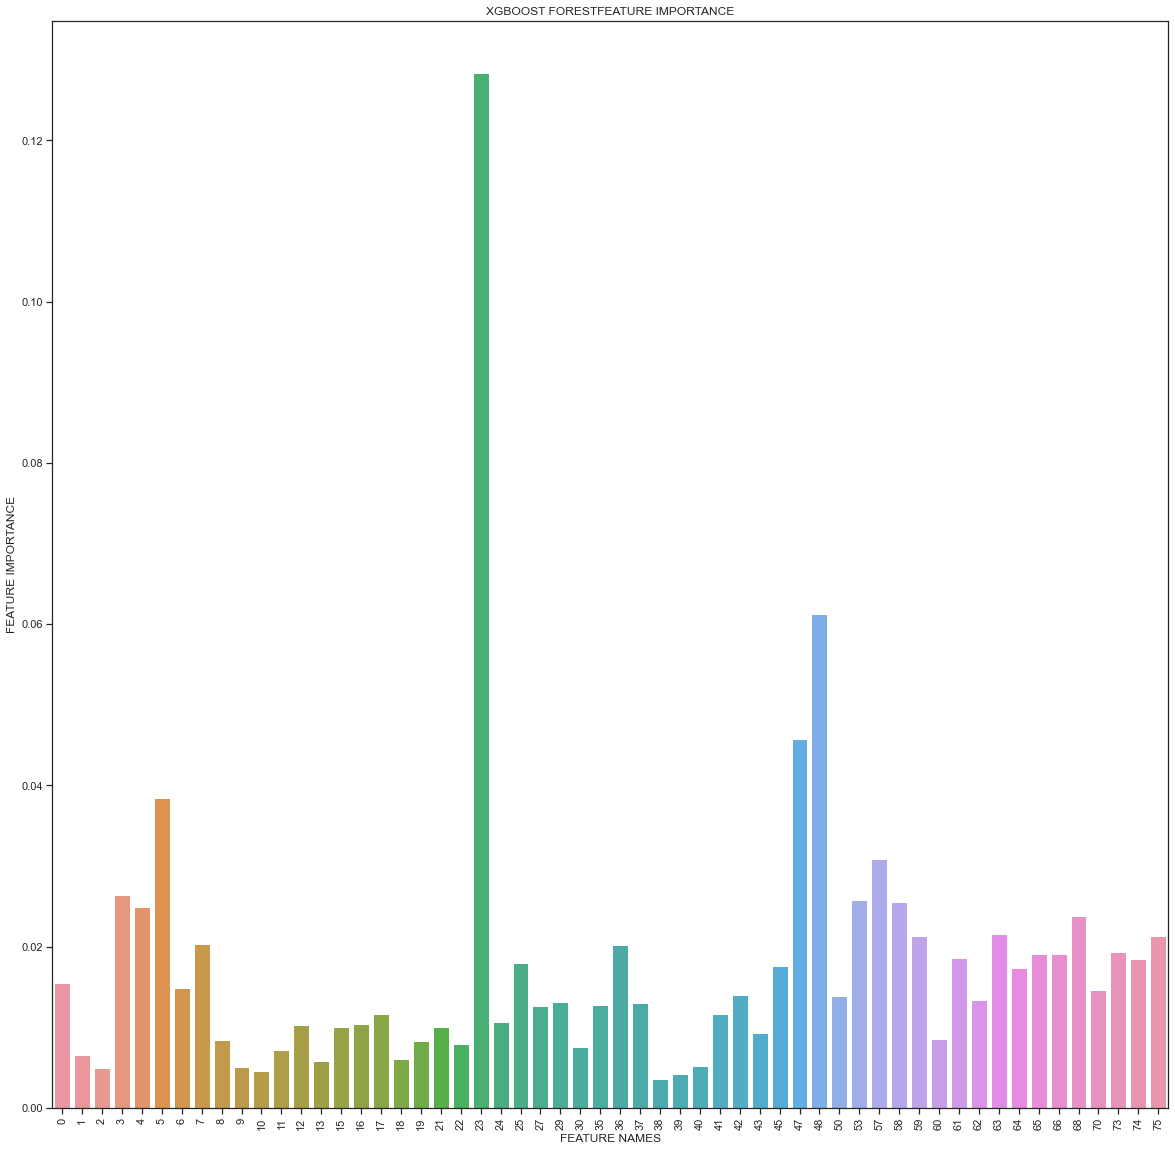

In [21]:
utils.plot_feature_importance(xg_reg.feature_importances_,x_train_tfidf.columns,'XGBOOST FOREST',figurePath)

In [22]:
utils.featureScore(xg_reg.feature_importances_)

Feature: 0, Score: 0.01550
Feature: 1, Score: 0.00664
Feature: 2, Score: 0.00492
Feature: 3, Score: 0.02643
Feature: 4, Score: 0.02498
Feature: 5, Score: 0.03849
Feature: 6, Score: 0.01483
Feature: 7, Score: 0.02036
Feature: 8, Score: 0.00848
Feature: 9, Score: 0.00512
Feature: 10, Score: 0.00455
Feature: 11, Score: 0.00721
Feature: 12, Score: 0.01035
Feature: 13, Score: 0.00583
Feature: 14, Score: 0.01006
Feature: 15, Score: 0.01040
Feature: 16, Score: 0.01165
Feature: 17, Score: 0.00608
Feature: 18, Score: 0.00829
Feature: 19, Score: 0.01011
Feature: 20, Score: 0.00790
Feature: 21, Score: 0.12838
Feature: 22, Score: 0.01069
Feature: 23, Score: 0.01803
Feature: 24, Score: 0.01260
Feature: 25, Score: 0.01309
Feature: 26, Score: 0.00751
Feature: 27, Score: 0.01283
Feature: 28, Score: 0.02027
Feature: 29, Score: 0.01308
Feature: 30, Score: 0.00363
Feature: 31, Score: 0.00421
Feature: 32, Score: 0.00522
Feature: 33, Score: 0.01161
Feature: 34, Score: 0.01402
Feature: 35, Score: 0.00929
Fe

## Random Forest

In [23]:
# utils.hyperparameterTuning_RandomForest(x_train_tfidf,y_train_tfidf)

In [24]:
rnd_clf = RandomForestRegressor(n_estimators=20, min_samples_split=10, min_samples_leaf=4,max_features='sqrt',max_depth=10,bootstrap=True)
rnd_clf.fit(x_train_tfidf, y_train_tfidf)
y_pred_tfidf = rnd_clf.predict(x_test_tfidf)
utils.metrics(y_test_tfidf,y_pred_tfidf)

RMSE: 0.031462

R2 Score: 0.424041

MAE : 0.010124

MSE : 0.000990

RMSLE : -3.458964

max_error : 0.639449



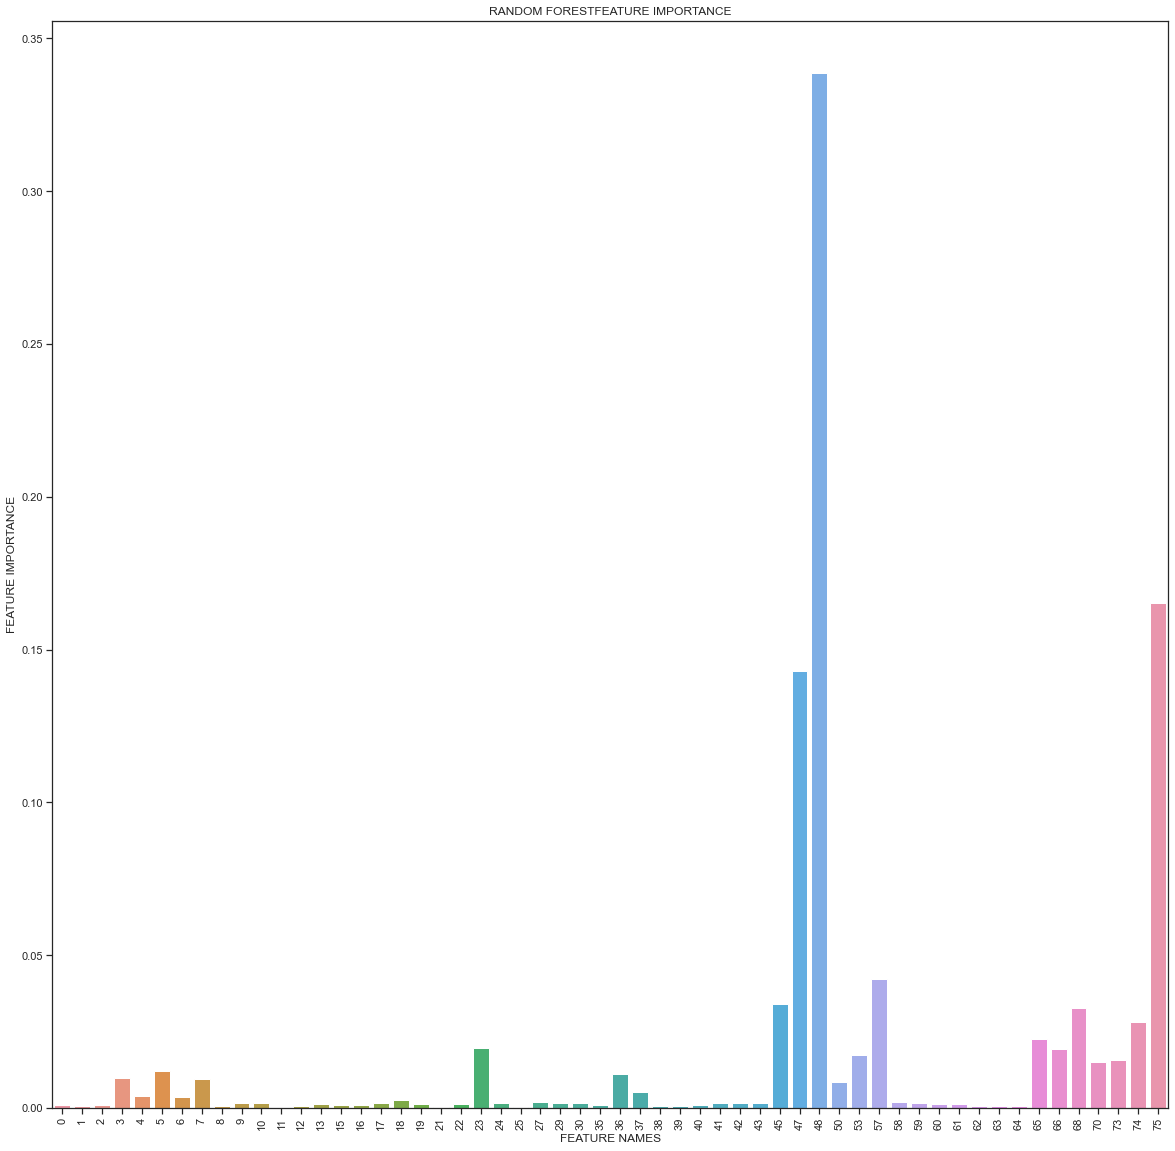

In [25]:
utils.plot_feature_importance(rnd_clf.feature_importances_,x_train_tfidf.columns,'RANDOM FOREST',figurePath)

In [26]:
utils.featureScore(rnd_clf.feature_importances_)

Feature: 0, Score: 0.00113
Feature: 1, Score: 0.00080
Feature: 2, Score: 0.00107
Feature: 3, Score: 0.00992
Feature: 4, Score: 0.00409
Feature: 5, Score: 0.01198
Feature: 6, Score: 0.00354
Feature: 7, Score: 0.00950
Feature: 8, Score: 0.00056
Feature: 9, Score: 0.00152
Feature: 10, Score: 0.00155
Feature: 11, Score: 0.00008
Feature: 12, Score: 0.00080
Feature: 13, Score: 0.00128
Feature: 14, Score: 0.00093
Feature: 15, Score: 0.00102
Feature: 16, Score: 0.00176
Feature: 17, Score: 0.00253
Feature: 18, Score: 0.00142
Feature: 19, Score: 0.00049
Feature: 20, Score: 0.00129
Feature: 21, Score: 0.01973
Feature: 22, Score: 0.00150
Feature: 23, Score: 0.00024
Feature: 24, Score: 0.00198
Feature: 25, Score: 0.00166
Feature: 26, Score: 0.00171
Feature: 27, Score: 0.00098
Feature: 28, Score: 0.01102
Feature: 29, Score: 0.00540
Feature: 30, Score: 0.00055
Feature: 31, Score: 0.00067
Feature: 32, Score: 0.00094
Feature: 33, Score: 0.00152
Feature: 34, Score: 0.00168
Feature: 35, Score: 0.00153
Fe

## MLP

In [27]:
# utils.hyperparameterTuning_MLP(x_train_tfidf,y_train_tfidf)

In [28]:
from sklearn.neural_network import MLPRegressor
mlp_GS = MLPRegressor(activation='relu',alpha=0.001,hidden_layer_sizes=(50, 50, 50),learning_rate='constant',solver='adam',random_state=random_state)
mlp_GS.fit(x_train_tfidf, y_train_tfidf)
y_pred_mlp = mlp_GS.predict(x_test_tfidf)

In [29]:
utils.metrics(y_test_tfidf,y_pred_mlp)

RMSE: 0.034106

R2 Score: 0.323203

MAE : 0.011618

MSE : 0.001163

RMSLE : -3.378296

max_error : 0.724670



## SVC

In [30]:
svr= LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,tol=0.0001, verbose=0,random_state=random_state)
svr.fit(x_train_tfidf, y_train_tfidf)
y_pred_SVR = svr.predict(x_test_tfidf)

In [31]:
utils.metrics(y_test_tfidf,y_pred_SVR)

RMSE: 0.043741

R2 Score: -0.113218

MAE : 0.013949

MSE : 0.001913

RMSLE : -3.129477

max_error : 0.920044

